Title: Regression Models

Linear Regression (Simple & Multiple)

Task 1: Differentiate between a labeled dataset of image classifications and an unlabeled dataset for clustering customer segments.

In [7]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# --- Simulate a Labeled Image Classification Dataset ---

# Imagine these are paths to your image files
image_paths = [f'image_{i}.jpg' for i in range(100)]

# These are the labels, pre-assigned by humans
# Let's say we have cats, dogs, and birds
labels = ['cat'] * 40 + ['dog'] * 35 + ['bird'] * 25
np.random.shuffle(labels) # Shuffle to mix them up

# Create a DataFrame to represent the dataset
labeled_data = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

print("--- Labeled Dataset (Image Classification) ---")
print("First 5 rows:")
print(labeled_data.head())
print("\nValue counts for labels:")
print(labeled_data['label'].value_counts())

# --- Typical operations with a labeled dataset ---

# 1. Encoding labels (often necessary for machine learning models)
label_encoder = LabelEncoder()
labeled_data['encoded_label'] = label_encoder.fit_transform(labeled_data['label'])

print("\nLabels after encoding:")
print(labeled_data.head())

# 2. Splitting into training and testing sets (essential for supervised learning)
X = labeled_data['image_path'] # Features (image paths)
y = labeled_data['encoded_label'] # Target (encoded labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# In a real scenario, X_train and X_test would hold actual image data or features extracted from images.
# y_train and y_test are the "ground truth" labels that the model tries to learn and predict.

--- Labeled Dataset (Image Classification) ---
First 5 rows:
    image_path label
0  image_0.jpg  bird
1  image_1.jpg   cat
2  image_2.jpg   dog
3  image_3.jpg   dog
4  image_4.jpg  bird

Value counts for labels:
label
cat     40
dog     35
bird    25
Name: count, dtype: int64

Labels after encoding:
    image_path label  encoded_label
0  image_0.jpg  bird              0
1  image_1.jpg   cat              1
2  image_2.jpg   dog              2
3  image_3.jpg   dog              2
4  image_4.jpg  bird              0

Training set size: 80
Testing set size: 20


Task 2: Examine a problem statement and determine which learning type is applicable.<br>

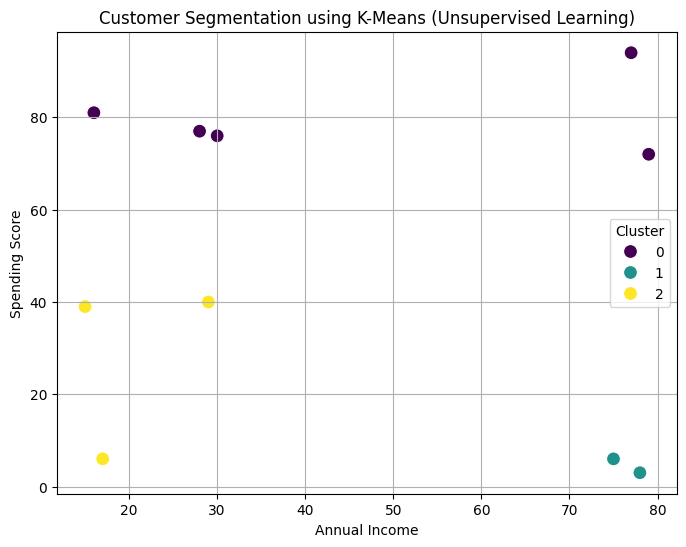

In [8]:
# Write your code here
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: customers' annual income and spending score
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'AnnualIncome': [15, 16, 17, 28, 29, 30, 75, 77, 78, 79],
    'SpendingScore': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
}

df = pd.DataFrame(data)

# Use KMeans to segment customers into groups
X = df[['AnnualIncome', 'SpendingScore']]

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means (Unsupervised Learning)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()


Task 3: Identify whether facial recognition systems use supervised or unsupervised learning and justify.

In [9]:
# Write your code here
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load dataset with faces of people who appear in at least 70 images
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Get features and labels
X = faces.data
y = faces.target
target_names = faces.target_names

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reduce dimensionality for better performance
pca = PCA(n_components=100, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a Support Vector Classifier
